<a href="https://colab.research.google.com/github/sivasakthi16/Software-Defect-Prediction/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install chart-studio

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py  # Updated import
import chart_studio  # Required for authentication
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import os

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')



# Load the dataset
data = pd.read_csv("/content/drive/My Drive/jm1.csv")

# Display first few rows
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     loc  v(g)  ev(g)  iv(g)      n        v     l      d       i         e  \
0    1.1   1.4    1.4    1.4    1.3     1.30  1.30   1.30    1.30      1.30   
1    1.0   1.0    1.0    1.0    1.0     1.00  1.00   1.00    1.00      1.00   
2   72.0   7.0    1.0    6.0  198.0  1134.13  0.05  20.31   55.85  23029.10   
3  190.0   3.0    1.0    3.0  600.0  4348.76  0.06  17.06  254.87  74202.67   
4   37.0   4.0    1.0    4.0  126.0   599.12  0.06  17.19   34.86  10297.30   

   ...  lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0  ...       2          2        2                  2      1.2        1.2   
1  ...       1          1        1                  1        1          1   
2  ...      51         10        8                  1       17         36   
3  ...     129         29       28                  2       17        135   
4  ...     

In [ ]:
defect_true_false = data.groupby('defects')['b'].apply(lambda x: x.count())
print('False: ', defect_true_false.iloc[0])  # Accessing first element correctly
print('True: ', defect_true_false.iloc[1])  # Accessing second element correctly


False:  8779
True:  2106


In [ ]:
trace = go.Histogram(
    x = data.defects,
    opacity = 0.75,
    name = "Defects",
    marker = dict(color = 'green'))

hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title = 'Defects',
                   xaxis = dict(title = 'True - False'),
                   yaxis = dict(title = 'Frequency'),
)

import plotly.io as pio
pio.renderers.default = 'colab'  # Explicitly set renderer for Colab
fig = go.Figure(data = hist_data, layout = hist_layout)
fig.show();

In [ ]:
import pandas as pd

# Count occurrences of '?' in each column
print(data.isin(['?']).sum())

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              5
uniq_Opnd            5
total_Op             5
total_Opnd           5
branchCount          5
defects              0
dtype: int64


In [ ]:
import numpy as np
data.replace('?', np.nan, inplace=True)


In [ ]:
print(data.isnull().sum())  # Check how many NaNs are in each column


loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              5
uniq_Opnd            5
total_Op             5
total_Opnd           5
branchCount          5
defects              0
dtype: int64


In [ ]:
# Fill missing numerical values with mean
data = data.fillna(data.mean(numeric_only=True))

# Fill missing categorical values with mode
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])  # Avoids chained assignment


#FEATURE SELECTION#

In [ ]:
data.corr()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
loc,1.000000,0.817757,0.517551,0.784057,0.881795,0.900293,-0.286587,0.689543,0.499946,0.750564,...,0.921918,0.612858,0.803573,0.278119,0.536570,0.764562,0.880923,0.868230,0.830153,0.245388
v(g),0.817757,1.000000,0.701710,0.859590,0.730781,0.759881,-0.252902,0.669057,0.303031,0.709501,...,0.799915,0.384506,0.538366,0.209811,0.647136,0.700369,0.744056,0.695973,0.971825,0.208644
ev(g),0.517551,0.701710,1.000000,0.639574,0.465992,0.445902,-0.233982,0.434009,0.213211,0.315538,...,0.454604,0.294208,0.338243,0.190911,0.262731,0.336871,0.479794,0.435381,0.785363,0.172973
iv(g),0.784057,0.859590,0.639574,1.000000,0.702415,0.743193,-0.197736,0.575369,0.309717,0.757702,...,0.775873,0.351583,0.541296,0.207028,0.500569,0.617877,0.715178,0.668876,0.858915,0.181984
n,0.881795,0.730781,0.465992,0.702415,1.000000,0.984276,-0.240749,0.808113,0.651209,0.716536,...,0.944383,0.596374,0.798561,0.284391,0.610221,0.836065,0.995606,0.989398,0.747831,0.204143
v,0.900293,0.759881,0.445902,0.743193,0.984276,1.000000,-0.198104,0.752206,0.598743,0.800000,...,0.962078,0.576844,0.792330,0.266537,0.606813,0.852202,0.981499,0.971892,0.759919,0.189136
l,-0.286587,-0.252902,-0.233982,-0.197736,-0.240749,-0.198104,1.000000,-0.347215,-0.166801,-0.062026,...,-0.218373,-0.165885,-0.223670,-0.106117,-0.305080,-0.234769,-0.237230,-0.240926,-0.279022,-0.164917
d,0.689543,0.669057,0.434009,0.575369,0.808113,0.752206,-0.347215,1.000000,0.398162,0.574298,...,0.768188,0.502121,0.637211,0.253793,0.749023,0.639568,0.817429,0.777618,0.671879,0.169629
i,0.499946,0.303031,0.213211,0.309717,0.651209,0.598743,-0.166801,0.398162,1.000000,0.209268,...,0.563920,0.392551,0.572352,0.217810,0.391479,0.726556,0.620586,0.687790,0.325744,0.192831
e,0.750564,0.709501,0.315538,0.757702,0.716536,0.800000,-0.062026,0.574298,0.209268,1.000000,...,0.809070,0.384806,0.600649,0.148693,0.481947,0.586764,0.735777,0.673466,0.667863,0.086036


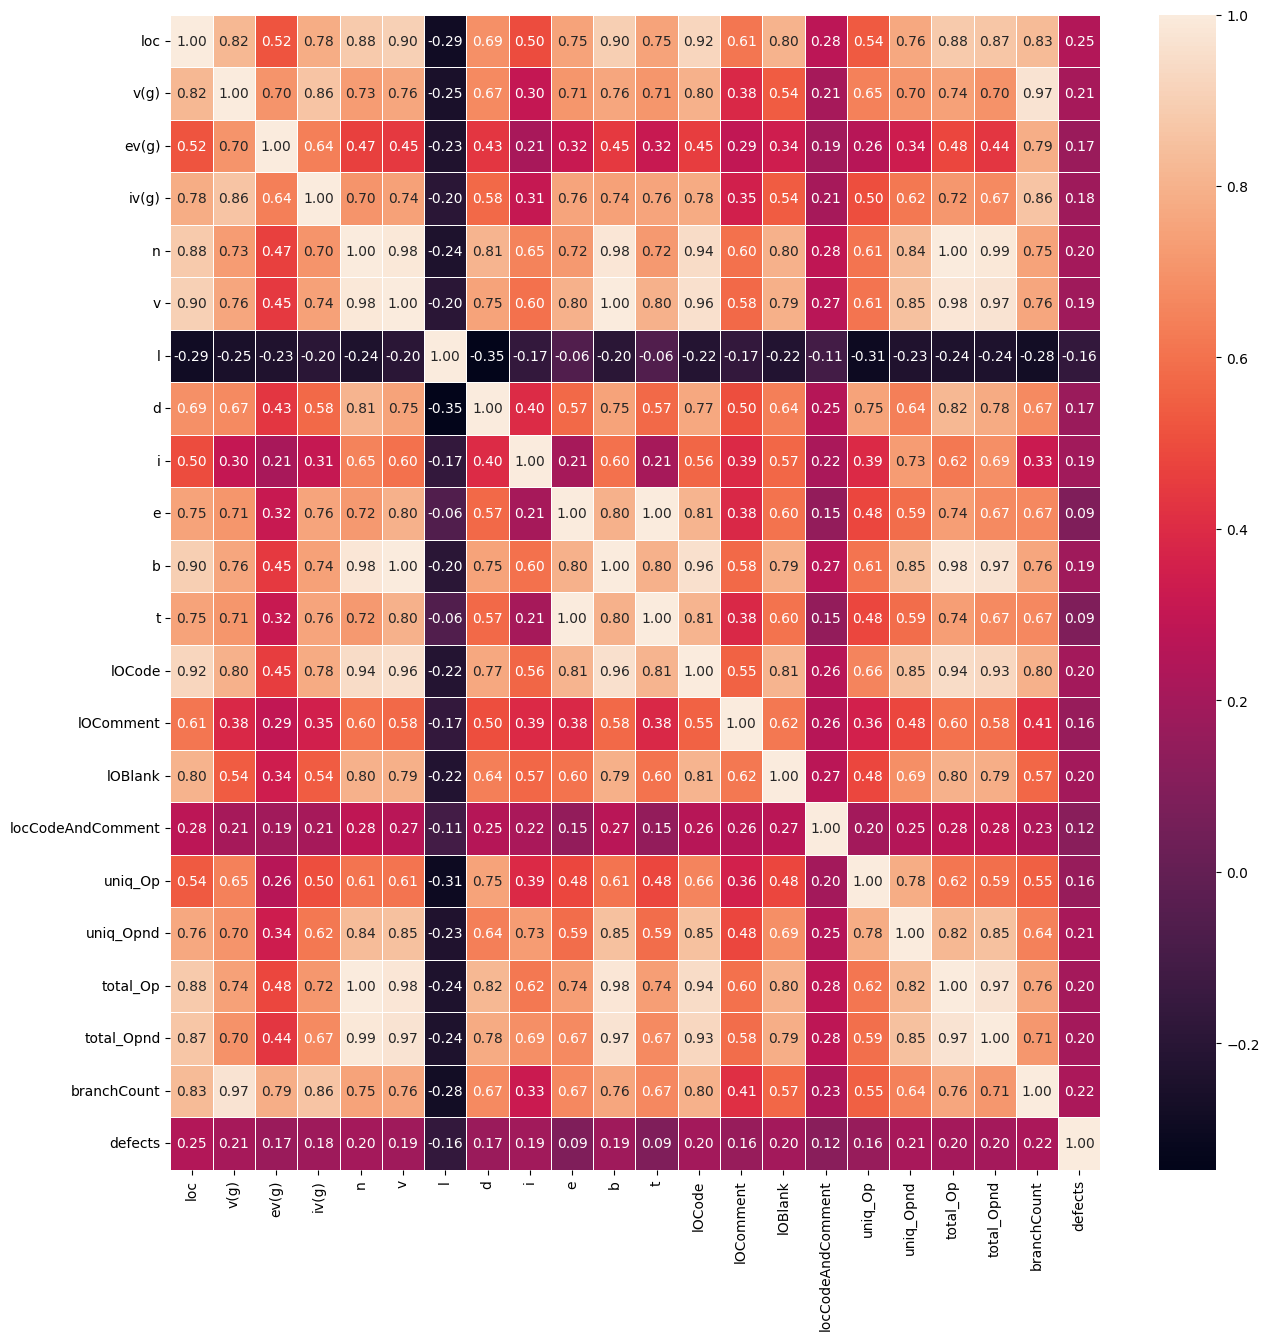

In [ ]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

In [ ]:
# Find columns that have high correlation (threshold > 0.9)
threshold = 0.9
corr_matrix = data.corr()

# Select the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than the threshold
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

print("Features to drop due to high correlation:", to_drop)


Features to drop due to high correlation: ['v', 'b', 't', 'lOCode', 'total_Op', 'total_Opnd', 'branchCount']


In [ ]:
# Drop the selected highly correlated columns
df_reduced = data.drop(columns=to_drop)

print("Remaining Features after removal:", df_reduced.columns)


Remaining Features after removal: Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'l', 'd', 'i', 'e', 'lOComment',
       'lOBlank', 'locCodeAndComment', 'uniq_Op', 'uniq_Opnd', 'defects'],
      dtype='object')


#PREPROCESSING#

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_reduced), columns=df_reduced.columns)

print("Scaled Data Ready for Model Training!")


Scaled Data Ready for Model Training!


In [ ]:
import pandas as pd

def evaluation_control(df_reduced):
    evaluation = (df_reduced['n'] < 300) & (df_reduced['l'] < 1000) & (df_reduced['d'] < 50) & (df_reduced['e'] < 500000)
    df_reduced['complexityEvaluation'] = ['Successful' if eval else 'Redesign' for eval in evaluation]
    return df_reduced  # Ensure the modified DataFrame is returned

# Call the function and store the result in 'df_reduced'
df_reduced = evaluation_control(df_reduced)

# Check if the column is added
print(df_reduced.head())  # Display first few rows

     loc  v(g)  ev(g)  iv(g)      n     l      d       i         e  lOComment  \
0    1.1   1.4    1.4    1.4    1.3  1.30   1.30    1.30      1.30          2   
1    1.0   1.0    1.0    1.0    1.0  1.00   1.00    1.00      1.00          1   
2   72.0   7.0    1.0    6.0  198.0  0.05  20.31   55.85  23029.10         10   
3  190.0   3.0    1.0    3.0  600.0  0.06  17.06  254.87  74202.67         29   
4   37.0   4.0    1.0    4.0  126.0  0.06  17.19   34.86  10297.30          1   

   lOBlank  locCodeAndComment uniq_Op uniq_Opnd  defects complexityEvaluation  
0        2                  2     1.2       1.2    False           Successful  
1        1                  1       1         1     True           Successful  
2        8                  1      17        36     True           Successful  
3       28                  2      17       135     True             Redesign  
4        6                  0      11        16     True           Successful  


In [ ]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   10885 non-null  float64
 1   v(g)                  10885 non-null  float64
 2   ev(g)                 10885 non-null  float64
 3   iv(g)                 10885 non-null  float64
 4   n                     10885 non-null  float64
 5   l                     10885 non-null  float64
 6   d                     10885 non-null  float64
 7   i                     10885 non-null  float64
 8   e                     10885 non-null  float64
 9   lOComment             10885 non-null  int64  
 10  lOBlank               10885 non-null  int64  
 11  locCodeAndComment     10885 non-null  int64  
 12  uniq_Op               10885 non-null  object 
 13  uniq_Opnd             10885 non-null  object 
 14  defects               10885 non-null  bool   
 15  complexityEvaluatio

#TRAIN & TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

# Example dataset (Replace X, y with your actual feature matrix and target variable)
X = df_reduced.drop(columns=['defects'])  # Features (drop target column)
Y = df_reduced['defects']  # Target variable

# Split the dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the splits
print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)


Training Set: (8708, 15) (8708,)
Testing Set: (2177, 15) (2177,)


#RF#

In [ ]:
#Parsing selection and verification datasets
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import model_selection

X = df_reduced.iloc[:, :-1].values  #Select related attribute values for selection
Y = df_reduced.complexityEvaluation.values   #Select classification attribute values

In [ ]:
#Newwwww label encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Y = encoder.fit_transform(Y)  # Convert categorical labels to numbers

In [ ]:
import numpy as np
unique, counts = np.unique(Y, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(976), np.int64(1): np.int64(9909)}


#RF#

In [ ]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=7)
rf_model.fit(X_train, Y_train)
from sklearn.ensemble import RandomForestClassifier

# Define the model with class weights
model = RandomForestClassifier(class_weight='balanced', random_state=0)

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Random Forests Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Random Forests Algorithm
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       180
           1       1.00      1.00      1.00      1997

    accuracy                           1.00      2177
   macro avg       1.00      0.99      0.99      2177
weighted avg       1.00      1.00      1.00      2177

[[ 176    4]
 [   1 1996]]
ACC:  0.9977032613688562


#SVM#

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Define the SVM model with balanced class weights
model = SVC(kernel='rbf', class_weight='balanced', random_state=0)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Summary of the predictions
print("SVM Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ACC: ", accuracy_score(y_test, y_pred))

SVM Algorithm
              precision    recall  f1-score   support

           0       0.74      0.97      0.84       180
           1       1.00      0.97      0.98      1997

    accuracy                           0.97      2177
   macro avg       0.87      0.97      0.91      2177
weighted avg       0.98      0.97      0.97      2177

[[ 174    6]
 [  62 1935]]
ACC:  0.9687643546164446


#Naive#

In [ ]:
#Creation of Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
from sklearn.model_selection import KFold, cross_val_score

scoring = 'accuracy'
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)  # shuffle=True is required

cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
msg = "Mean : %f - Std : (%f)" % (cv_results.mean(), cv_results.std())
msg

'Mean : 0.247583 - Std : (0.119653)'

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Naive Bayes Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Naive Bayes Algorithm
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       180
           1       1.00      0.99      0.99      1997

    accuracy                           0.99      2177
   macro avg       0.94      0.97      0.95      2177
weighted avg       0.99      0.99      0.99      2177

[[ 172    8]
 [  23 1974]]
ACC:  0.9857602204869086


#Ensemble With SMOTE#

In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('svm', svm.SVC(kernel='rbf', C=0.1, probability=True, random_state=42)),
    ('nb', GaussianNB())
]

# Define meta-classifier (Logistic Regression for final prediction)
meta_model = LogisticRegression()

# Create Stacking Ensemble
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=3)

# Train the Stacking Model on the resampled data
stacking_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = stacking_model.predict(X_test)

# Evaluation
print(" Stacking Ensemble Model with SMOTE ")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

 Stacking Ensemble Model with SMOTE 
Accuracy: 0.9954065227377125
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       180
           1       1.00      1.00      1.00      1997

    accuracy                           1.00      2177
   macro avg       0.98      0.99      0.99      2177
weighted avg       1.00      1.00      1.00      2177

Confusion Matrix:
 [[ 177    3]
 [   7 1990]]
